In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split,
                                    RepeatedStratifiedKFold,
                                    KFold,
                                    cross_val_score,
                                    GridSearchCV
                                    )
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, auc, roc_curve,
                            accuracy_score, precision_score,
                            recall_score, f1_score,
                            PrecisionRecallDisplay, RocCurveDisplay,
                            ConfusionMatrixDisplay, classification_report 
                            )
from sklearn import metrics
from statistics import stdev
from sklearn.svm import SVC
import seaborn as sns


In [2]:
data = pd.read_csv('Phone.csv')
df = pd.DataFrame(data)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,n_cores,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,2,1
1,1021,1,0.5,1,0,1,53,0.7,136,6,905,1988,2631,17,3,7,1,1,0,3,2
2,563,1,0.5,1,2,1,41,0.9,145,6,1263,1716,2603,11,2,9,1,1,0,5,2
3,615,1,2.5,0,0,0,10,0.8,131,9,1216,1786,2769,16,8,11,1,0,0,6,2
4,1821,1,1.2,0,13,1,44,0.6,141,14,1208,1212,1411,8,2,15,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,14,1222,1890,668,13,4,19,1,1,0,6,0
1996,1965,1,2.6,1,0,0,39,0.2,187,3,915,1965,2032,11,10,16,1,1,1,4,2
1997,1911,0,0.9,1,1,1,36,0.7,108,3,868,1632,3057,9,1,5,1,1,0,8,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,336,670,869,18,10,19,1,1,1,5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   pc             2000 non-null   int64  
 10  px_height      2000 non-null   int64  
 11  px_width       2000 non-null   int64  
 12  ram            2000 non-null   int64  
 13  sc_h           2000 non-null   int64  
 14  sc_w           2000 non-null   int64  
 15  talk_time      2000 non-null   int64  
 16  three_g        2000 non-null   int64  
 17  touch_screen   2000 non-null   int64  
 18  wifi    

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,n_cores,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,4.520500,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,2.287837,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,3.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,4.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,7.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,8.000000,3.000000


# Preprocessing

In [7]:
df = df[df['fc'] > 0]
df = df[df['pc'] > 0]
df = df[df['px_height'] > 0]
df = df[df['sc_w'] > 0]
df = df.reset_index()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1393 non-null   int64  
 1   battery_power  1393 non-null   int64  
 2   blue           1393 non-null   int64  
 3   clock_speed    1393 non-null   float64
 4   dual_sim       1393 non-null   int64  
 5   fc             1393 non-null   int64  
 6   four_g         1393 non-null   int64  
 7   int_memory     1393 non-null   int64  
 8   m_dep          1393 non-null   float64
 9   mobile_wt      1393 non-null   int64  
 10  pc             1393 non-null   int64  
 11  px_height      1393 non-null   int64  
 12  px_width       1393 non-null   int64  
 13  ram            1393 non-null   int64  
 14  sc_h           1393 non-null   int64  
 15  sc_w           1393 non-null   int64  
 16  talk_time      1393 non-null   int64  
 17  three_g        1393 non-null   int64  
 18  touch_sc

In [9]:
data = pd.read_csv('Phone.csv')
df = pd.DataFrame(data)

In [10]:
df['fc'].replace(0, df['fc'].mean(), inplace=True)
df['pc'].replace(0, df['pc'].mean(), inplace=True)
df['px_height'].replace(0, df['px_height'].mean(), inplace=True)
df['sc_w'].replace(0, df['sc_w'].mean(), inplace=True)

/tmp/ipykernel_8457/2345127642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fc'].replace(0, df['fc'].mean(), inplace=True)
/tmp/ipykernel_8457/2345127642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [11]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,n_cores,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,5.330851,0.521500,32.046500,0.501750,140.249000,10.417283,645.753108,1251.515500,2124.213000,12.306500,6.28603,11.011000,0.761500,0.503000,0.507000,4.520500,1.500000
std,439.418206,0.5001,0.816004,0.500035,3.660702,0.499662,18.145715,0.288416,35.399655,5.617518,443.310973,432.199447,1084.732044,4.213245,3.96408,5.463955,0.426273,0.500116,0.500076,2.287837,1.118314
min,501.000000,0.0000,0.500000,0.000000,1.000000,0.000000,2.000000,0.100000,80.000000,1.000000,1.000000,500.000000,256.000000,5.000000,1.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,3.000000,0.000000,16.000000,0.200000,109.000000,6.000000,284.000000,874.750000,1207.500000,9.000000,3.00000,6.000000,1.000000,0.000000,0.000000,3.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,4.309500,1.000000,32.000000,0.500000,141.000000,10.000000,568.000000,1247.000000,2146.500000,12.000000,5.76700,11.000000,1.000000,1.000000,1.000000,4.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.00000,16.000000,1.000000,1.000000,1.000000,7.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.00000,20.000000,1.000000,1.000000,1.000000,8.000000,3.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   pc             2000 non-null   float64
 10  px_height      2000 non-null   float64
 11  px_width       2000 non-null   int64  
 12  ram            2000 non-null   int64  
 13  sc_h           2000 non-null   int64  
 14  sc_w           2000 non-null   float64
 15  talk_time      2000 non-null   int64  
 16  three_g        2000 non-null   int64  
 17  touch_screen   2000 non-null   int64  
 18  wifi    

# Charts

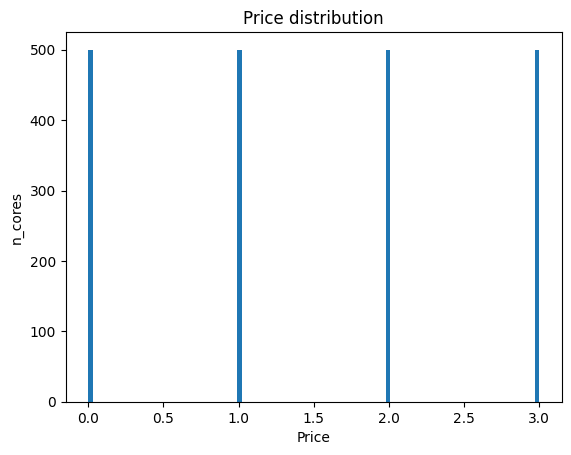

In [13]:
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("n_cores")
x = df['price_range']
plt.hist(x, 100)
plt.show()

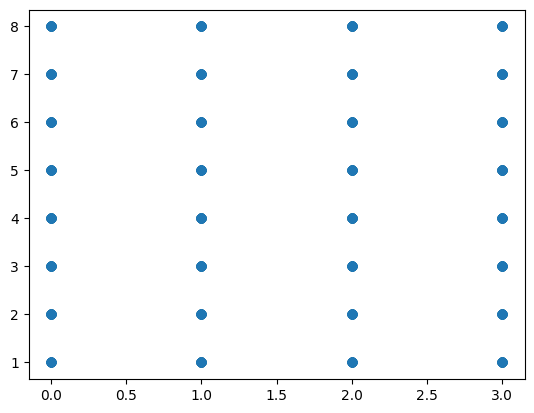

In [14]:
x = df['price_range']
y = df['n_cores']
plt.scatter(x, y)
plt.show() 

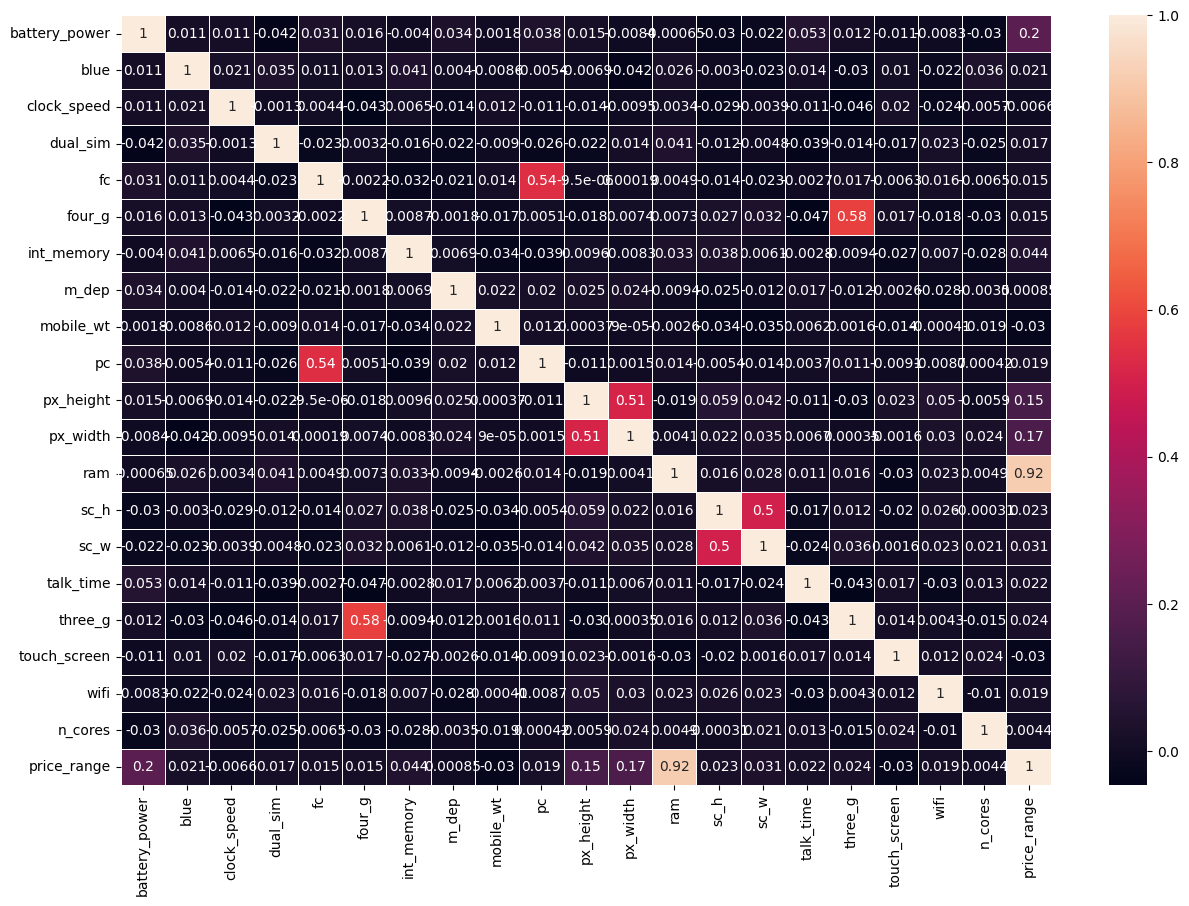

In [15]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True,cbar = True, linewidths=0.5 )
plt.show()

# Train_test_split

In [16]:
x = df.drop('price_range', axis=1)
y = df['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Find best K in KNN model

In [17]:
K = 15
accuracy = np.zeros ((K))
data = []
for i in range(2 , K+1):
    Knn = KNeighborsClassifier(n_neighbors = i)
    Knn.fit(x_train, y_train)
    y_pred = Knn.predict(x_test)
    accuracy[i-1] = metrics.accuracy_score(y_test, y_pred)
    data.append({metrics.accuracy_score(y_test, y_pred): i})
print(data)
print(f'\nBest Accuracy is obtained {max(accuracy)}', "for K =", np.array(accuracy).argmax()+1)

[{0.9: 2}, {0.9375: 3}, {0.9125: 4}, {0.9275: 5}, {0.9375: 6}, {0.9525: 7}, {0.95: 8}, {0.9425: 9}, {0.9525: 10}, {0.95: 11}, {0.95: 12}, {0.9525: 13}, {0.95: 14}, {0.955: 15}]

Best Accuracy is obtained 0.955 for K = 15


# KNN model

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=K)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9550


# Confusion matrix

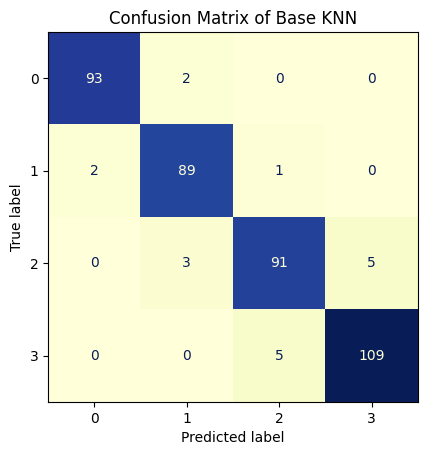

In [19]:
ConfusionMatrixDisplay.from_estimator(knn_model, x_test, y_test, colorbar=False, cmap='YlGnBu')
plt.title('Confusion Matrix of Base KNN')
plt.grid(False)
plt.show()

# Classification Report

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.95      0.97      0.96        92
           2       0.94      0.92      0.93        99
           3       0.96      0.96      0.96       114

    accuracy                           0.95       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.95      0.95      0.95       400



# Check for Overfitting

In [21]:
print('Training set score: {:.4f}'.format(knn_model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(knn_model.score(x_test, y_test)))

Training set score: 0.9425
Test set score: 0.9550


# K-Fold Cross-validation

In [22]:
kf = KFold(n_splits=10, shuffle=False)

# Cross Validation Accuracy

In [23]:
score = cross_val_score(knn_model, x_train, y_train, cv=kf, scoring='accuracy')
knn_model_cv_score1 = score.mean()
knn_model_cv_stdev1 = stdev(score)
print('Cross Validation Accuracy scores are: {}'.format(score))

Cross Validation Accuracy scores are: [0.9125  0.9125  0.90625 0.9375  0.9375  0.9     0.90625 0.95    0.94375
 0.9    ]


In [24]:
Accuracy  = ['Cross Validation Accuracy ']
knn_A = pd.DataFrame({'CV Mean':knn_model_cv_score1,'Std':knn_model_cv_stdev1},index=Accuracy )
print(knn_A)

                             CV Mean       Std
Cross Validation Accuracy   0.920625  0.019331


# Training SVM Model

In [25]:
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score: 0.9550


# Check for Overfitting

In [26]:
print('Training set score: {:.4f}'.format(svm_model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(svm_model.score(x_test, y_test)))

Training set score: 0.9556
Test set score: 0.9550


# Cross Validation Accuracy

In [27]:
score = cross_val_score(svm_model, x_train, y_train, cv=kf, scoring='accuracy')
svm_model_cv_score = score.mean()
svm_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.94375 0.93125 0.9375  0.95625 0.95    0.9375  0.925   0.96875 0.96875
 0.95   ]


In [28]:
Accuracy = ['Cross Validation Accuracy']
svm_A = pd.DataFrame({'CV Mean':svm_model_cv_score,'Std':svm_model_cv_stdev},index=Accuracy)
print(svm_A)

                            CV Mean       Std
Cross Validation Accuracy  0.946875  0.014805


# Roc Curve

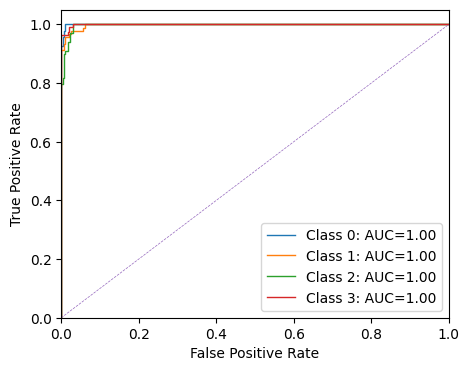

In [29]:
y_Pred_prob = svm_model.predict_proba(x_test)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)
    plt.show()        
roc_curve_plot(y_test, y_Pred_prob)

# Grid search for SVC

In [ ]:
model = SVC(probability=True)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
C = [0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
param_grid = {'C': C, 'kernel': kernel, 'gamma': gamma} 
search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)
GridSearchCV = search.fit(x_train, y_train)
svm_modelcv = GridSearchCV.best_estimator_
print('Best Score: %s' % GridSearchCV.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV.best_params_)